In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/adult_with_headers.csv')
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.duplicated().sum()

24

In [5]:
cleaned_df = df.drop_duplicates()

In [6]:
cleaned_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
cleaned_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


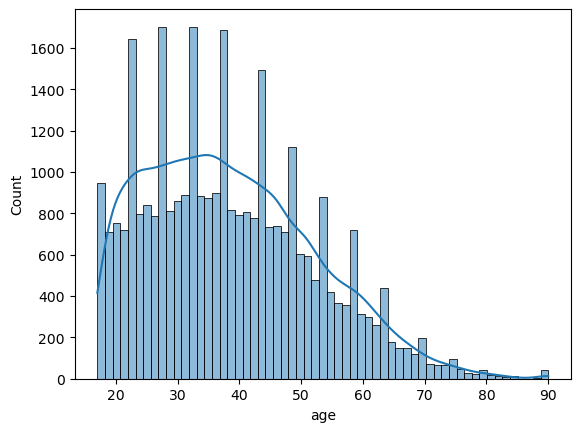

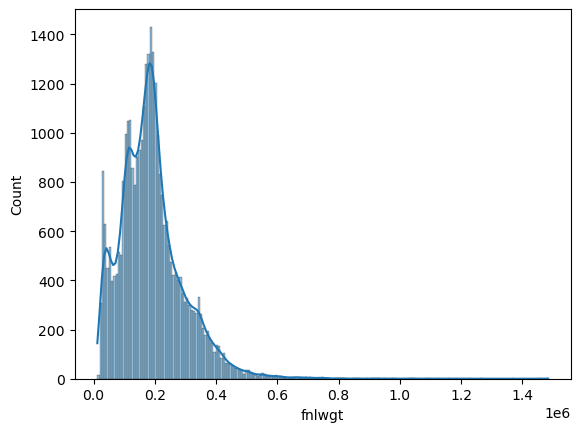

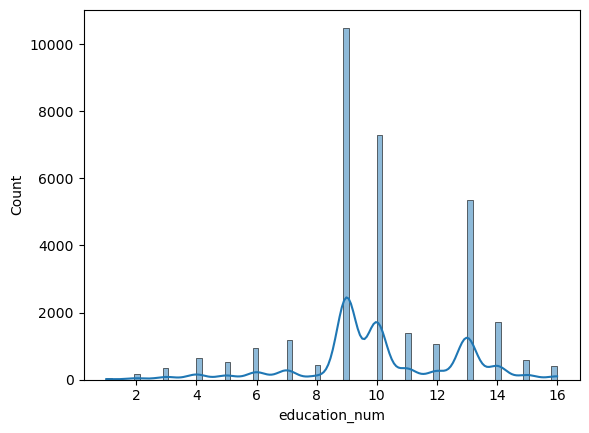

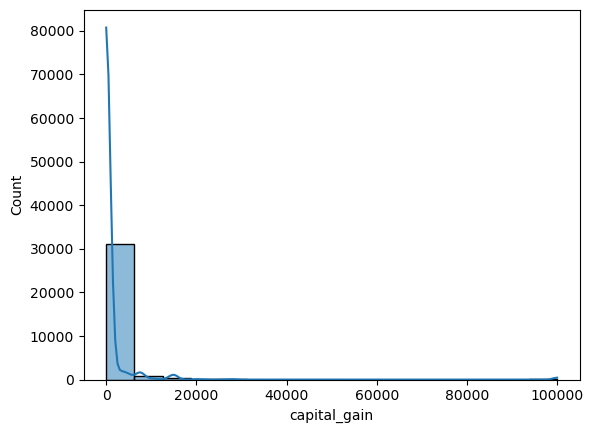

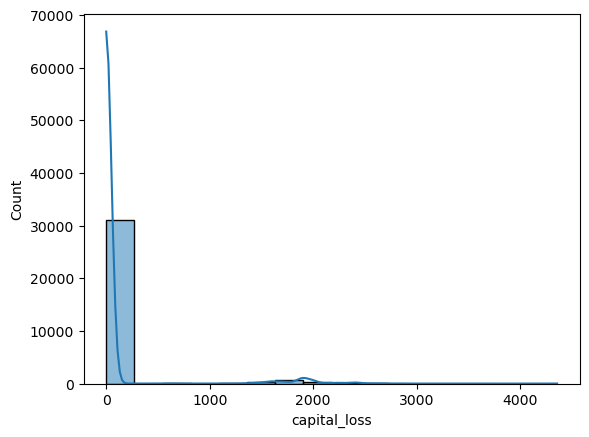

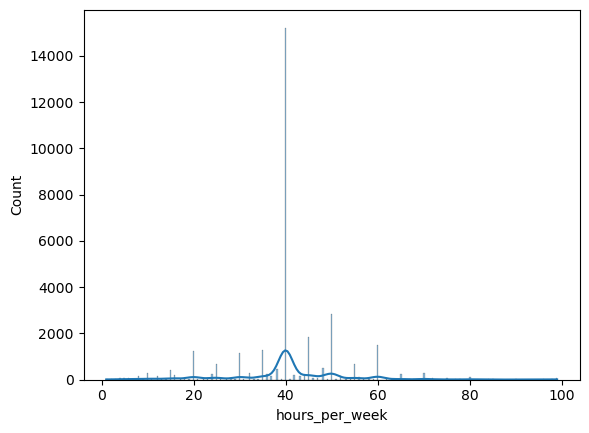

In [8]:
numerical_cols = cleaned_df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    sb.histplot(df[col], kde=True)
    plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scalar = StandardScaler()
x = cleaned_df[['education_num', 'hours_per_week']]
scaled_data = std_scalar.fit_transform(x)
scaled_data = pd.DataFrame(scaled_data, columns=x.columns)
# standardization technique specially used to remove the units from any continuous random variables
# but still i performed scantardization to show, how it works
# it will transfer the whole data in between -3 to +3

mm_scalar = MinMaxScaler()
x = cleaned_df[['age']] 
mscaled_data = mm_scalar.fit_transform(x)
mscaled_data = pd.DataFrame(mscaled_data, columns=x.columns)
# it will transfer the whole data in between 0 and 1

cleaned_df[['education_num', 'hours_per_week']] = scaled_data
cleaned_df[['age']] = mscaled_data

In [10]:
categorical_cols = cleaned_df.select_dtypes(include='object').columns

for col in categorical_cols:
    num_categories = cleaned_df[col].nunique()
    print(f"Column '{col}': {num_categories} unique categories")

Column 'workclass': 9 unique categories
Column 'education': 16 unique categories
Column 'marital_status': 7 unique categories
Column 'occupation': 15 unique categories
Column 'relationship': 6 unique categories
Column 'race': 5 unique categories
Column 'sex': 2 unique categories
Column 'native_country': 42 unique categories
Column 'income': 2 unique categories


In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
d_enc = []

for col in categorical_cols:    
    num_categories = cleaned_df[col].nunique()
    
    if(num_categories > 5):  # LabelEncoder 
        LE = LabelEncoder()
        cleaned_df[col] = LE.fit_transform(cleaned_df[col])  
        #-----------------------------------------------------
    else:                    # OneHotEncoder
        OHE = OneHotEncoder()                                
        d = OHE.fit_transform(df[[col]]).toarray()
        
        d = pd.DataFrame(d)
        cleaned_df = cleaned_df.join(d)        
        
        catgs = cleaned_df[col].unique()
        i = 0
        columns = {}
        for cat in catgs:
            columns[i] = cat
            i = i + 1
            
        cleaned_df.rename(columns=columns, inplace=True)        
        cleaned_df.drop(col, axis=1, inplace=True)
        #--------------------------------------------------------

cleaned_df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other,Male,Female,<=50K,>50K
0,0.301370,7,77516,9,1.134777,4,1,1,2174,0,...,39,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.452055,6,83311,9,1.134777,2,4,0,0,0,...,39,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.287671,4,215646,11,-0.420679,0,6,1,0,0,...,39,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [12]:
cleaned_df['capital_net'] = cleaned_df['capital_gain'] - cleaned_df['capital_loss']
# The new feature "capital_net" represents overall capital change
cleaned_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other,Male,Female,<=50K,>50K,capital_net
0,0.301370,7,77516,9,1.134777,4,1,1,2174,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2174
1,0.452055,6,83311,9,1.134777,2,4,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
2,0.287671,4,215646,11,-0.420679,0,6,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
3,0.493151,4,234721,1,-1.198407,2,6,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0
4,0.150685,4,338409,9,1.134777,2,10,5,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0


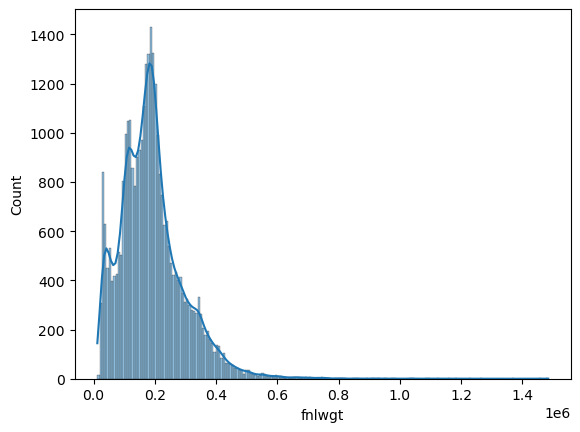

In [13]:
sb.histplot(cleaned_df['fnlwgt'], kde=True)
plt.show()

In [14]:
# fnlwgt
print(cleaned_df['fnlwgt'].skew())
cleaned_df['Log_fnlwgt'] = np.log1p(cleaned_df['fnlwgt'])
print(cleaned_df['Log_fnlwgt'].skew())

1.4477029083495345
-0.8422036603276939


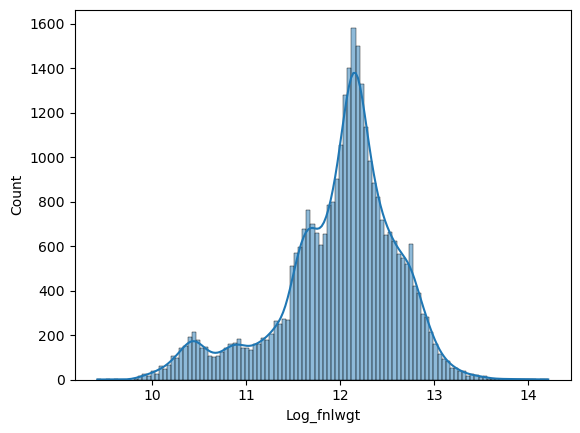

In [15]:
sb.histplot(cleaned_df['Log_fnlwgt'], kde=True)
plt.show()